In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity, NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'CHD.csv'  # Replace with your dataset's path
chd_data = pd.read_csv(file_path)

# Handle missing values by imputing with class averages
chd_data.fillna(chd_data.groupby('TenYearCHD').transform('mean'), inplace=True)

# Split the dataset into two groups
group_0 = chd_data[chd_data['TenYearCHD'] == 0]
group_1 = chd_data[chd_data['TenYearCHD'] == 1]


In [12]:
# Rectangular Kernel
def rectangular_kernel(x, x_points, bandwidth):
    weights = np.abs((x - x_points) / bandwidth) <= 1
    return np.sum(weights) / (2 * bandwidth * len(x_points))

# Triangular Kernel
def triangular_kernel(x, x_points, bandwidth):
    weights = 1 - np.abs((x - x_points) / bandwidth)
    weights = np.clip(weights, 0, None)
    return np.sum(weights) / (bandwidth * len(x_points))

# Epanechnikov Kernel
def epanechnikov_kernel(x, x_points, bandwidth):
    weights = 0.75 * (1 - ((x - x_points) / bandwidth) ** 2)
    weights = np.clip(weights, 0, None)
    return np.sum(weights) / (bandwidth * len(x_points))

# Function to apply custom KDE for a given kernel
def custom_kde(x_points, kernel, bandwidth, x_grid):
    densities = np.zeros(len(x_grid))
    for i, x in enumerate(x_grid):
        densities[i] = kernel(x, x_points, bandwidth)
    return densities


In [13]:
# KNN Density Estimation
def knn_density_estimation(data, k, x_grid):
    nbrs = NearestNeighbors(n_neighbors=k).fit(data)
    distances, _ = nbrs.kneighbors(x_grid[:, None])
    densities = k / (len(data) * np.sum(distances, axis=1))
    return densities


c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


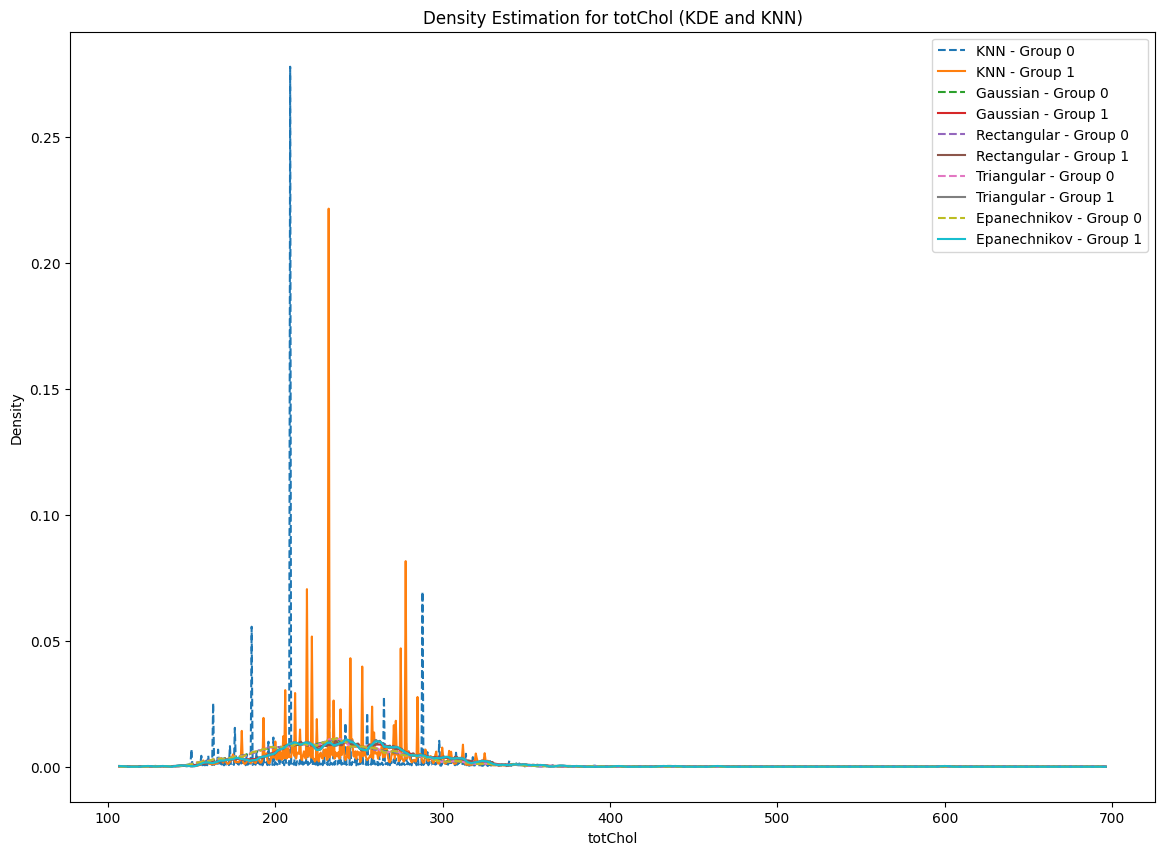

C:\Users\sajal\AppData\Local\Temp\ipykernel_46664\2163569762.py:5: RuntimeWarning: divide by zero encountered in divide
  densities = k / (len(data) * np.sum(distances, axis=1))
C:\Users\sajal\AppData\Local\Temp\ipykernel_46664\2163569762.py:5: RuntimeWarning: divide by zero encountered in divide
  densities = k / (len(data) * np.sum(distances, axis=1))
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


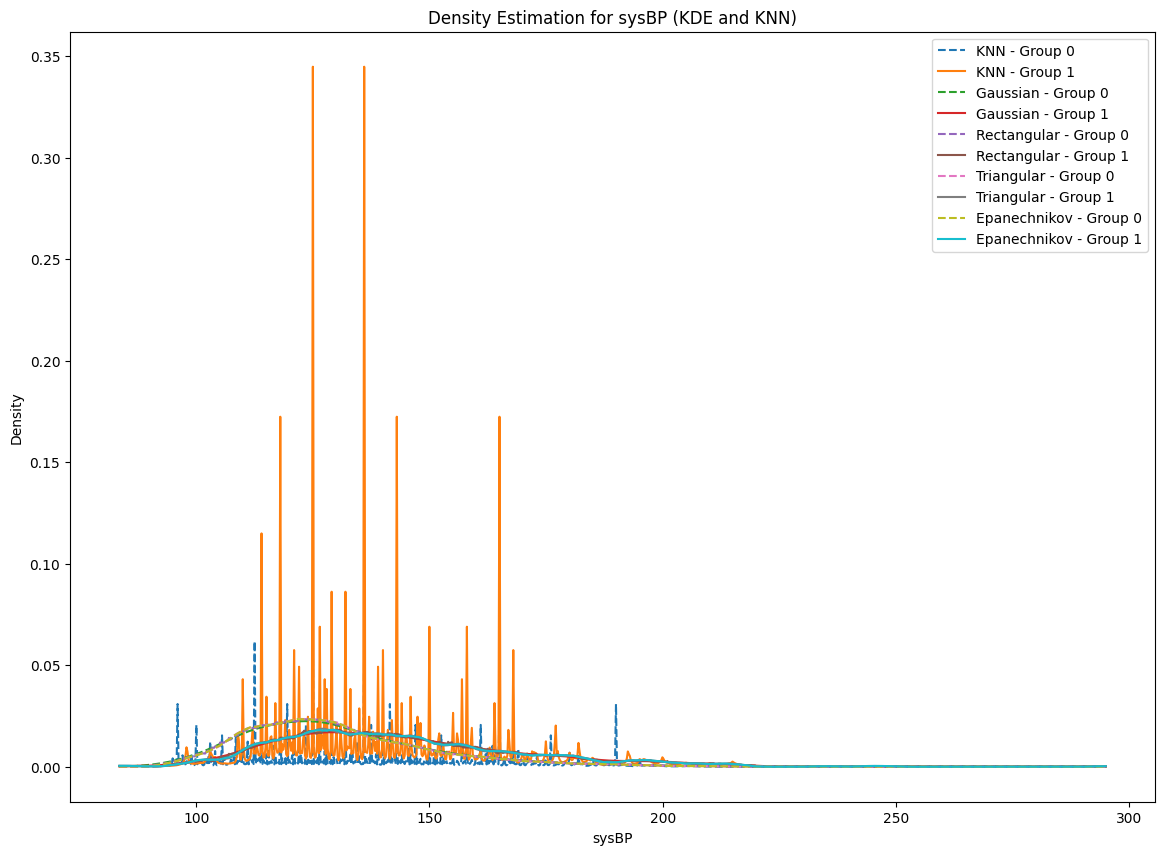

C:\Users\sajal\AppData\Local\Temp\ipykernel_46664\2163569762.py:5: RuntimeWarning: divide by zero encountered in divide
  densities = k / (len(data) * np.sum(distances, axis=1))
C:\Users\sajal\AppData\Local\Temp\ipykernel_46664\2163569762.py:5: RuntimeWarning: divide by zero encountered in divide
  densities = k / (len(data) * np.sum(distances, axis=1))
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


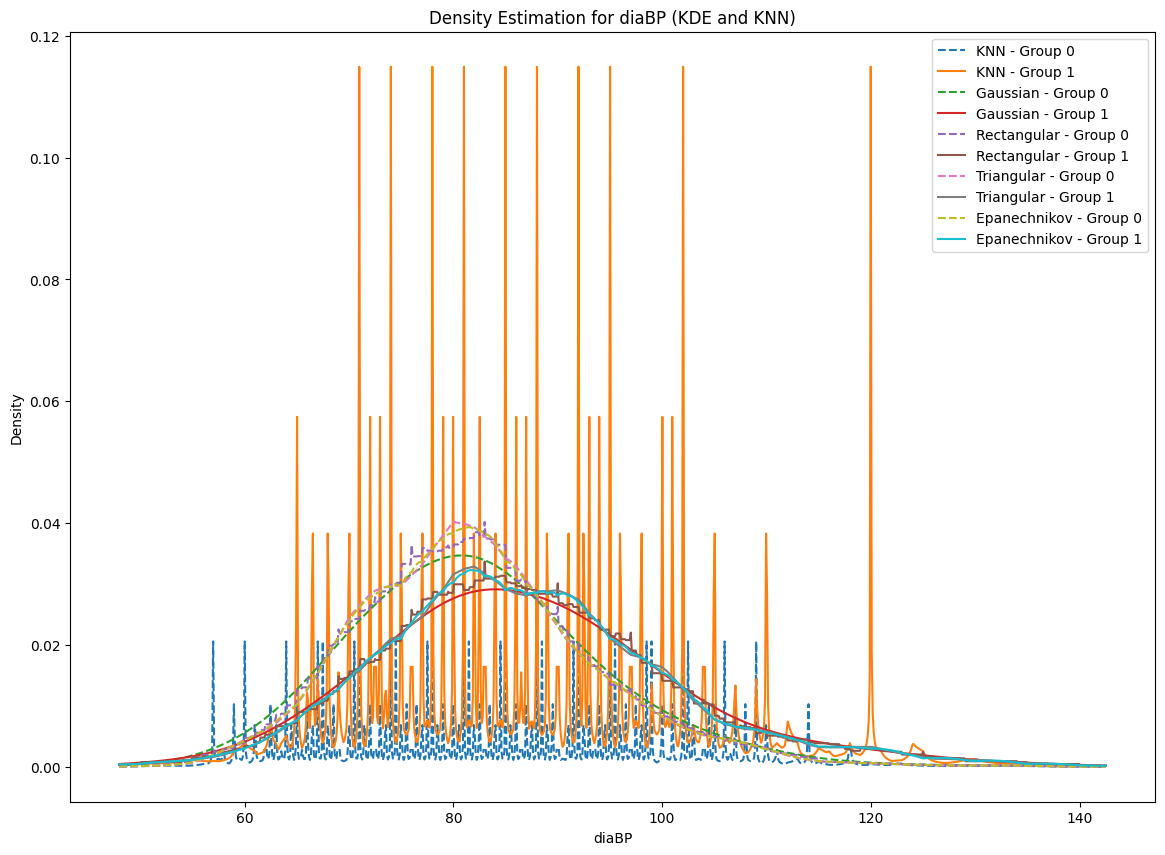

In [14]:
# Variables for analysis and bandwidth
variables = ['totChol', 'sysBP', 'diaBP']
bandwidth = 5
kernels = {
    'Gaussian': 'gaussian', 
    'Rectangular': rectangular_kernel, 
    'Triangular': triangular_kernel, 
    'Epanechnikov': epanechnikov_kernel
}

# Plot KDE and KNN for each variable
for var in variables:
    x_grid = np.linspace(chd_data[var].min(), chd_data[var].max(), 1000)
    plt.figure(figsize=(14, 10))
    
    # KNN Density Estimation
    density_knn_0 = knn_density_estimation(group_0[[var]].values, k=5, x_grid=x_grid)
    density_knn_1 = knn_density_estimation(group_1[[var]].values, k=5, x_grid=x_grid)
    plt.plot(x_grid, density_knn_0, label='KNN - Group 0', linestyle='--')
    plt.plot(x_grid, density_knn_1, label='KNN - Group 1')
    
    # KDE for all kernels
    for kernel_name, kernel_func in kernels.items():
        if kernel_name == 'Gaussian':
            kde_0 = KernelDensity(kernel=kernel_func, bandwidth=bandwidth).fit(group_0[[var]])
            kde_1 = KernelDensity(kernel=kernel_func, bandwidth=bandwidth).fit(group_1[[var]])
            density_0 = np.exp(kde_0.score_samples(x_grid[:, None]))
            density_1 = np.exp(kde_1.score_samples(x_grid[:, None]))
        else:
            density_0 = custom_kde(group_0[var].values, kernel_func, bandwidth, x_grid)
            density_1 = custom_kde(group_1[var].values, kernel_func, bandwidth, x_grid)
        
        plt.plot(x_grid, density_0, label=f'{kernel_name} - Group 0', linestyle='--')
        plt.plot(x_grid, density_1, label=f'{kernel_name} - Group 1')

    plt.title(f'Density Estimation for {var} (KDE and KNN)')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


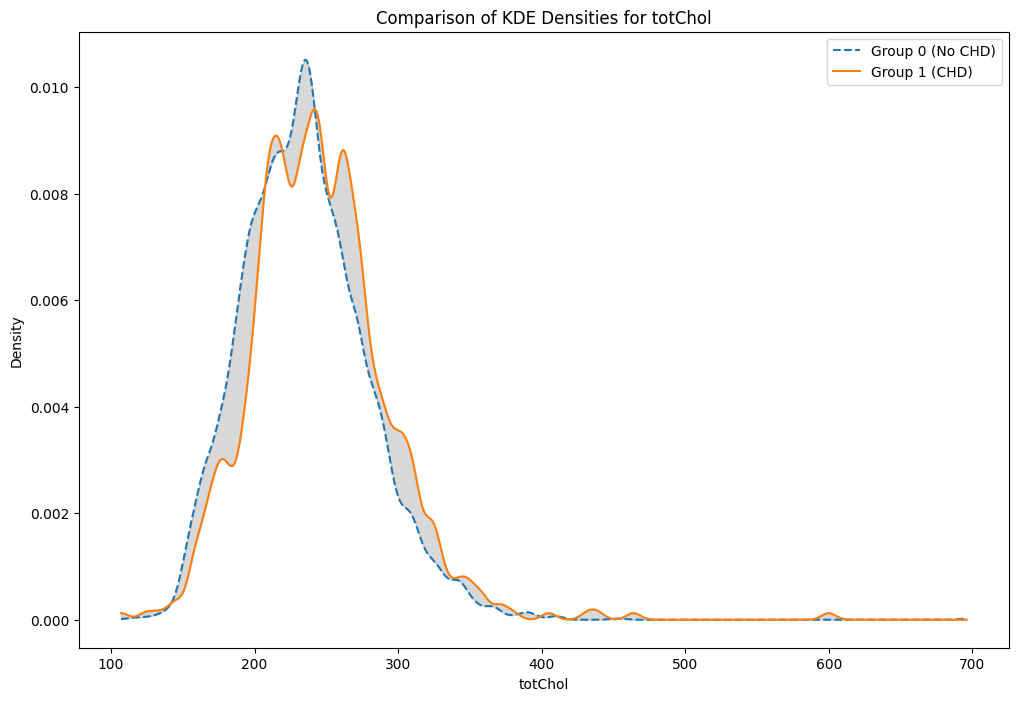

c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


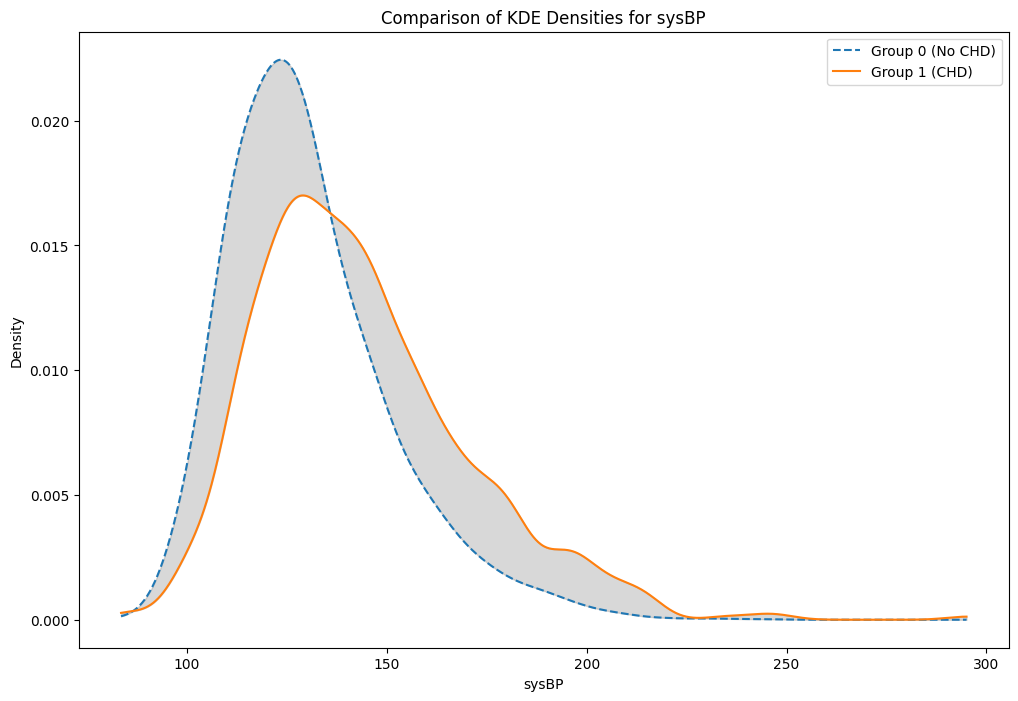

c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


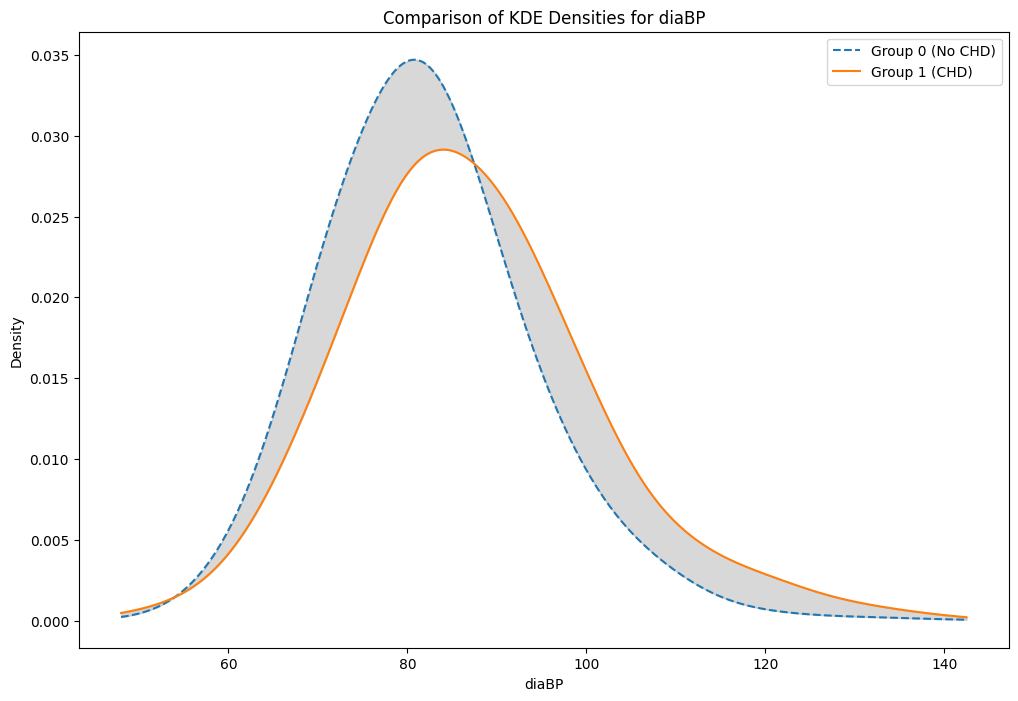

In [15]:
# Comparison of Gaussian KDE Densities
for var in variables:
    kde_0 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(group_0[[var]])
    kde_1 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(group_1[[var]])
    
    x_grid = np.linspace(chd_data[var].min(), chd_data[var].max(), 1000)
    density_0 = np.exp(kde_0.score_samples(x_grid[:, None]))
    density_1 = np.exp(kde_1.score_samples(x_grid[:, None]))
    
    plt.figure(figsize=(12, 8))
    plt.plot(x_grid, density_0, label='Group 0 (No CHD)', linestyle='--')
    plt.plot(x_grid, density_1, label='Group 1 (CHD)')
    plt.fill_between(x_grid, density_0, density_1, color='gray', alpha=0.3)
    plt.title(f'Comparison of KDE Densities for {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [16]:
# Tail Probability Calculation
thresholds = {'totChol': [240, 280, 300], 'sysBP': [140, 160, 180], 'diaBP': [90, 100, 110]}
def tail_probability(kde, thresholds):
    return [1 - np.exp(kde.score_samples([[t]])) for t in thresholds]

tail_probs = {}
for var in variables:
    kde_0 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(group_0[[var]])
    kde_1 = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(group_1[[var]])
    
    thresholds_var = thresholds[var]
    tail_probs[var] = {
        "Group 0": tail_probability(kde_0, thresholds_var),
        "Group 1": tail_probability(kde_1, thresholds_var)
    }

for var, probs in tail_probs.items():
    print(f"\nTail Probabilities for {var}:")
    print(pd.DataFrame(probs, index=[f'Threshold {t}' for t in thresholds[var]]))



Tail Probabilities for totChol:
                            Group 0               Group 1
Threshold 240  [0.9899781575555563]  [0.9904736031533324]
Threshold 280  [0.9954190856451799]  [0.9946533291484495]
Threshold 300  [0.9976830575508597]  [0.9964423575621534]

Tail Probabilities for sysBP:
                            Group 0               Group 1
Threshold 140  [0.9864990206828704]  [0.9842750155251654]
Threshold 160   [0.994878801436293]  [0.9908365475313184]
Threshold 180  [0.9982377963290697]  [0.9950655448684338]

Tail Probabilities for diaBP:
                            Group 0               Group 1
Threshold 90   [0.9762103027275358]  [0.9732906285099433]
Threshold 100  [0.9906726951924085]  [0.9845533923845325]
Threshold 110  [0.9969308928253879]  [0.9939288282418779]


c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity wa

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


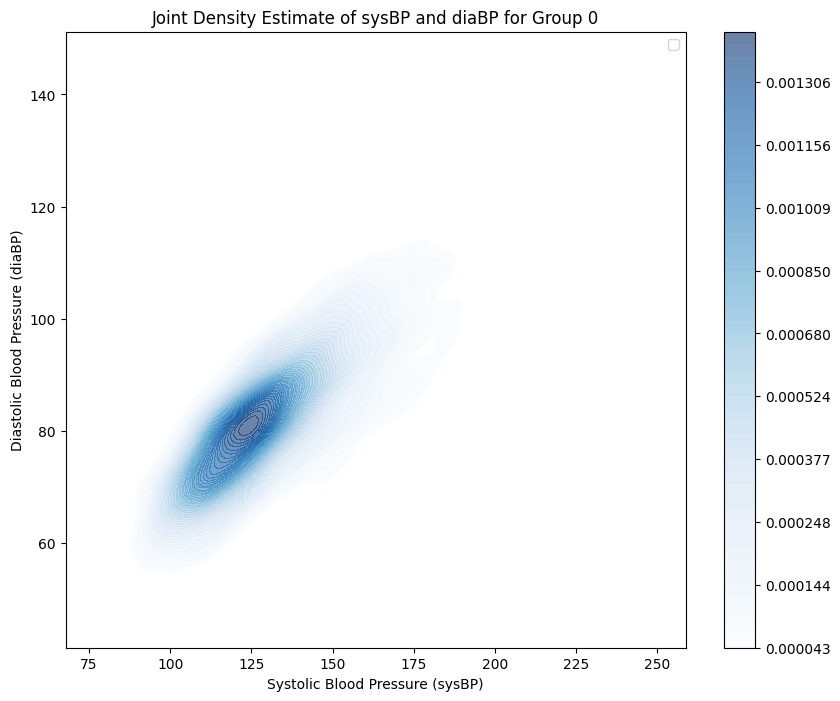

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


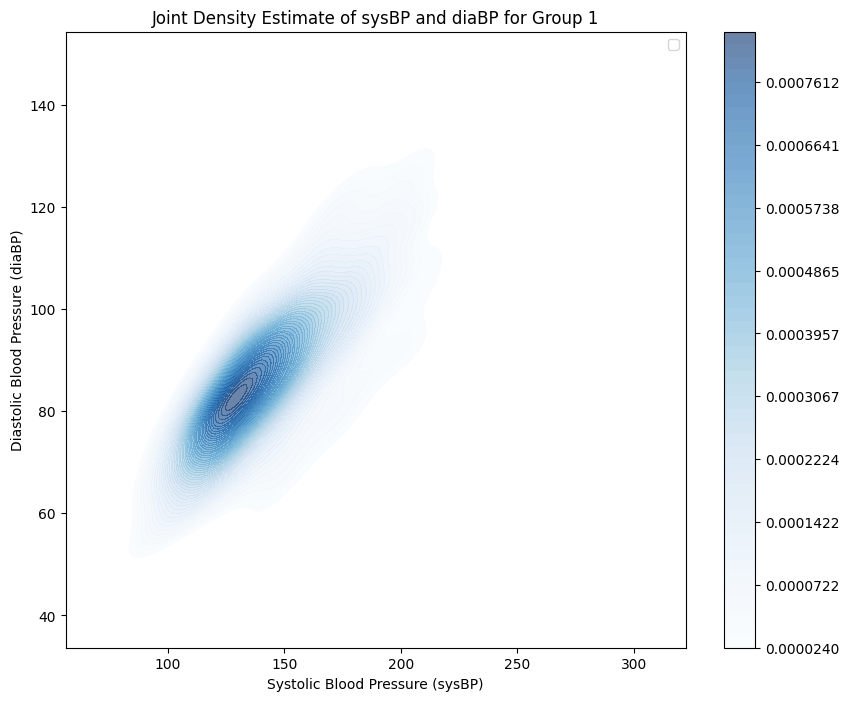

In [17]:
# Joint Density Estimation for sysBP and diaBP
for group, data in [('Group 0', group_0), ('Group 1', group_1)]:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(
        x=data['sysBP'], y=data['diaBP'], cmap="Blues", fill=True, cbar=True, 
        levels=50, label=group, alpha=0.6
    )
    plt.title(f"Joint Density Estimate of sysBP and diaBP for {group}")
    plt.xlabel('Systolic Blood Pressure (sysBP)')
    plt.ylabel('Diastolic Blood Pressure (diaBP)')
    plt.legend()
    plt.show()


c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


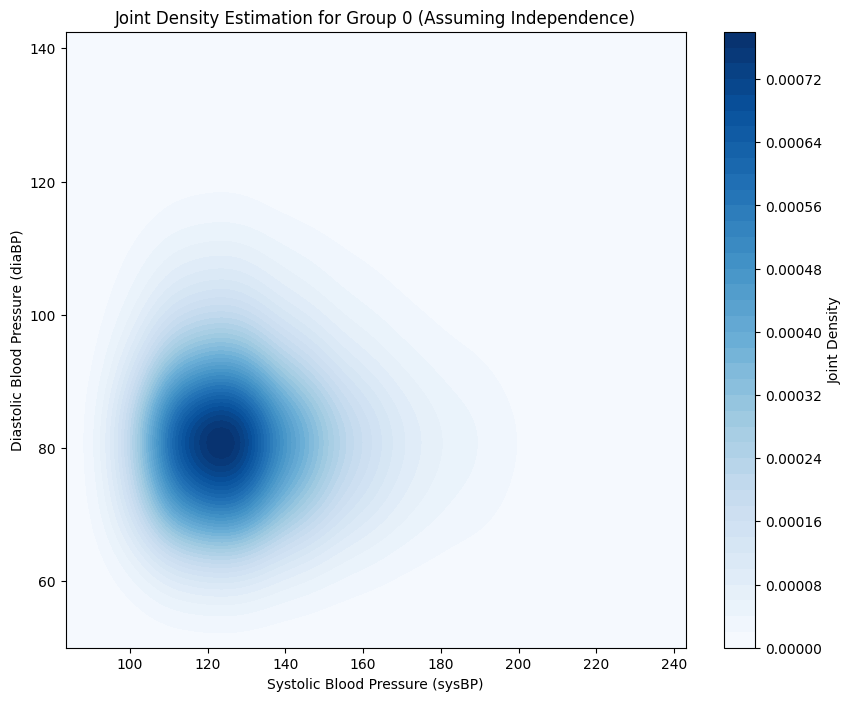

c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
c:\Users\sajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


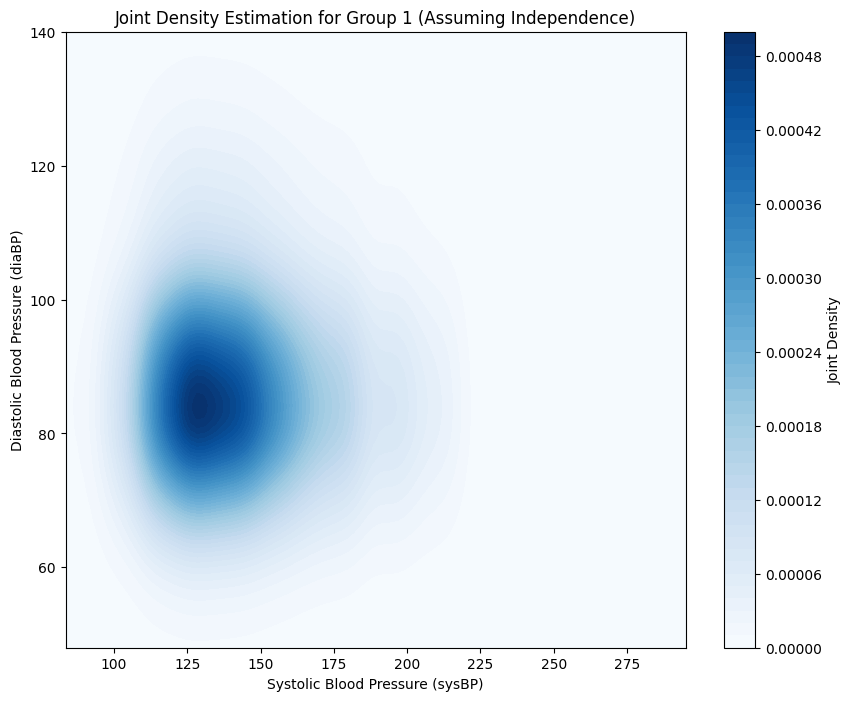

In [18]:
# Joint Density Estimation by Assuming Independence
for group, (data_sysBP, data_diaBP) in [('Group 0', (group_0, group_0)), ('Group 1', (group_1, group_1))]:
    kde_sysBP = KernelDensity(kernel='gaussian', bandwidth=5).fit(data_sysBP[['sysBP']])
    kde_diaBP = KernelDensity(kernel='gaussian', bandwidth=5).fit(data_diaBP[['diaBP']])

    # Generate grid for joint density
    x_sysBP = np.linspace(data_sysBP['sysBP'].min(), data_sysBP['sysBP'].max(), 100)
    y_diaBP = np.linspace(data_diaBP['diaBP'].min(), data_diaBP['diaBP'].max(), 100)
    X, Y = np.meshgrid(x_sysBP, y_diaBP)

    # Flatten grid for scoring
    X_flat = X.ravel()
    Y_flat = Y.ravel()

    # Marginal densities
    log_density_sysBP = kde_sysBP.score_samples(X_flat[:, None])
    log_density_diaBP = kde_diaBP.score_samples(Y_flat[:, None])

    # Joint density under independence
    joint_density = np.exp(log_density_sysBP + log_density_diaBP).reshape(X.shape)

    # Plot joint density
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, joint_density, cmap="Blues", levels=50)
    plt.colorbar(label="Joint Density")
    plt.title(f"Joint Density Estimation for {group} (Assuming Independence)")
    plt.xlabel('Systolic Blood Pressure (sysBP)')
    plt.ylabel('Diastolic Blood Pressure (diaBP)')
    plt.show()
